In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2

import ntpath
import random
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
file_paths = []
for dirname, _, filenames in os.walk('/kaggle/input/lung-dataset/Audio Files/'):
    for filename in filenames:
        file_paths.append(os.path.join(dirname,filename))
        
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
file_paths

['/kaggle/input/lung-dataset/Audio Files/EP76_N,N,A L U,31,M.wav',
 '/kaggle/input/lung-dataset/Audio Files/EP93_N,N,P R M,75,M.wav',
 '/kaggle/input/lung-dataset/Audio Files/BP13_Heart Failure,C,P L L,55,M.wav',
 '/kaggle/input/lung-dataset/Audio Files/BP23_Lung Fibrosis,Crep,P R L ,50,M.wav',
 '/kaggle/input/lung-dataset/Audio Files/EP67_heart failure,Crep,P R L ,24,F.wav',
 '/kaggle/input/lung-dataset/Audio Files/EP79_asthma,E W,A R U,46,M.wav',
 '/kaggle/input/lung-dataset/Audio Files/BP24_heart failure,Crep,P R L ,76,F.wav',
 '/kaggle/input/lung-dataset/Audio Files/DP32_N,N,A R L,30,M.wav',
 '/kaggle/input/lung-dataset/Audio Files/DP83_N,N,A R U,18,F.wav',
 '/kaggle/input/lung-dataset/Audio Files/EP58_asthma,E W,P L M,40,M.wav',
 '/kaggle/input/lung-dataset/Audio Files/BP50_N,N,P R L ,27,M.wav',
 '/kaggle/input/lung-dataset/Audio Files/DP36_pneumonia,Crep,P R M,36,F.wav',
 '/kaggle/input/lung-dataset/Audio Files/EP21_BRON,Crep,P R L ,20,M.wav',
 '/kaggle/input/lung-dataset/Audio F

In [4]:
DATASET_PATH = '../input/lung-dataset/Audio Files'

data_dir = pathlib.Path(DATASET_PATH)

In [5]:
data_dir

PosixPath('../input/lung-dataset/Audio Files')

In [6]:
commands= np.array(tf.io.gfile.listdir(str(data_dir)))
comands= commands[commands != 'README.md']
a = [line.split(',') for line in commands] 
b = [x[0].split('_') for x in a] 
label = [c[1] for c in b] 
#     print(label)
    

In [7]:
label

['N',
 'N',
 'Heart Failure',
 'Lung Fibrosis',
 'heart failure',
 'asthma',
 'heart failure',
 'N',
 'N',
 'asthma',
 'N',
 'pneumonia',
 'BRON',
 'pneumonia',
 'heart failure',
 'asthma',
 'Asthma',
 'N',
 'N',
 'copd',
 'Lung Fibrosis',
 'asthma',
 'asthma',
 'pneumonia',
 'Asthma',
 'N',
 'Asthma',
 'Heart Failure + Lung Fibrosis ',
 'heart failure',
 'COPD',
 'heart failure',
 'heart failure',
 'Lung Fibrosis',
 'Asthma',
 'pneumonia',
 'COPD',
 'BRON',
 'Asthma',
 'asthma',
 'N',
 'N',
 'heart failure',
 'heart failure',
 'asthma',
 'N',
 'Heart Failure + Lung Fibrosis ',
 'asthma',
 'pneumonia',
 'BRON',
 'pneumonia',
 'asthma',
 'COPD',
 'Lung Fibrosis',
 'COPD',
 'heart failure',
 'Heart Failure',
 'Asthma',
 'N',
 'Asthma',
 'Asthma',
 'N',
 'N',
 'Asthma and lung fibrosis',
 'Asthma',
 'N',
 'heart failure',
 'Heart Failure + Lung Fibrosis ',
 'N',
 'N',
 'N',
 'N',
 'COPD',
 'N',
 'COPD',
 'Plueral Effusion',
 'N',
 'N',
 'N',
 'asthma',
 'N',
 'heart failure',
 'Asthma',
 

In [113]:
label = [x.lower() for x in label] 

In [114]:
label

['n',
 'n',
 'heart failure',
 'lung fibrosis',
 'heart failure',
 'asthma',
 'heart failure',
 'n',
 'n',
 'asthma',
 'n',
 'pneumonia',
 'bron',
 'pneumonia',
 'heart failure',
 'asthma',
 'asthma',
 'n',
 'n',
 'copd',
 'lung fibrosis',
 'asthma',
 'asthma',
 'pneumonia',
 'asthma',
 'n',
 'asthma',
 'heart failure + lung fibrosis ',
 'heart failure',
 'copd',
 'heart failure',
 'heart failure',
 'lung fibrosis',
 'asthma',
 'pneumonia',
 'copd',
 'bron',
 'asthma',
 'asthma',
 'n',
 'n',
 'heart failure',
 'heart failure',
 'asthma',
 'n',
 'heart failure + lung fibrosis ',
 'asthma',
 'pneumonia',
 'bron',
 'pneumonia',
 'asthma',
 'copd',
 'lung fibrosis',
 'copd',
 'heart failure',
 'heart failure',
 'asthma',
 'n',
 'asthma',
 'asthma',
 'n',
 'n',
 'asthma and lung fibrosis',
 'asthma',
 'n',
 'heart failure',
 'heart failure + lung fibrosis ',
 'n',
 'n',
 'n',
 'n',
 'copd',
 'n',
 'copd',
 'plueral effusion',
 'n',
 'n',
 'n',
 'asthma',
 'n',
 'heart failure',
 'asthma',
 

In [126]:

for i in range(336):
    if label[i] == 'asthma and lung fibrosis':
        label[i] = 'asthma'
        
    elif label[i] == 'heart failure + copd' or label[i] == 'heart failure + lung fibrosis ':
        label[i] = 'heart failure'
    else:
        label[i] = label[i]

In [127]:
label

['n',
 'n',
 'heart failure',
 'lung fibrosis',
 'heart failure',
 'asthma',
 'heart failure',
 'n',
 'n',
 'asthma',
 'n',
 'pneumonia',
 'bron',
 'pneumonia',
 'heart failure',
 'asthma',
 'asthma',
 'n',
 'n',
 'copd',
 'lung fibrosis',
 'asthma',
 'asthma',
 'pneumonia',
 'asthma',
 'n',
 'asthma',
 'heart failure',
 'heart failure',
 'copd',
 'heart failure',
 'heart failure',
 'lung fibrosis',
 'asthma',
 'pneumonia',
 'copd',
 'bron',
 'asthma',
 'asthma',
 'n',
 'n',
 'heart failure',
 'heart failure',
 'asthma',
 'n',
 'heart failure',
 'asthma',
 'pneumonia',
 'bron',
 'pneumonia',
 'asthma',
 'copd',
 'lung fibrosis',
 'copd',
 'heart failure',
 'heart failure',
 'asthma',
 'n',
 'asthma',
 'asthma',
 'n',
 'n',
 'asthma',
 'asthma',
 'n',
 'heart failure',
 'heart failure',
 'n',
 'n',
 'n',
 'n',
 'copd',
 'n',
 'copd',
 'plueral effusion',
 'n',
 'n',
 'n',
 'asthma',
 'n',
 'heart failure',
 'asthma',
 'n',
 'plueral effusion',
 'heart failure',
 'copd',
 'asthma',
 'ast

In [115]:
return_unique_labels(label)

['n',
 'n',
 'heart failure',
 'lung fibrosis',
 'heart failure',
 'asthma',
 'heart failure',
 'n',
 'n',
 'asthma',
 'n',
 'pneumonia',
 'bron',
 'pneumonia',
 'heart failure',
 'asthma',
 'asthma',
 'n',
 'n',
 'copd',
 'lung fibrosis',
 'asthma',
 'asthma',
 'pneumonia',
 'asthma',
 'n',
 'asthma',
 'heart failure + lung fibrosis ',
 'heart failure',
 'copd',
 'heart failure',
 'heart failure',
 'lung fibrosis',
 'asthma',
 'pneumonia',
 'copd',
 'bron',
 'asthma',
 'asthma',
 'n',
 'n',
 'heart failure',
 'heart failure',
 'asthma',
 'n',
 'heart failure + lung fibrosis ',
 'asthma',
 'pneumonia',
 'bron',
 'pneumonia',
 'asthma',
 'copd',
 'lung fibrosis',
 'copd',
 'heart failure',
 'heart failure',
 'asthma',
 'n',
 'asthma',
 'asthma',
 'n',
 'n',
 'asthma and lung fibrosis',
 'asthma',
 'n',
 'heart failure',
 'heart failure + lung fibrosis ',
 'n',
 'n',
 'n',
 'n',
 'copd',
 'n',
 'copd',
 'plueral effusion',
 'n',
 'n',
 'n',
 'asthma',
 'n',
 'heart failure',
 'asthma',
 

In [128]:
label_set = set(label)

In [129]:
label_set

{'asthma',
 'bron',
 'copd',
 'heart failure',
 'lung fibrosis',
 'n',
 'plueral effusion',
 'pneumonia'}

In [130]:
lab = []
for i in label_set:
    print(i)

asthma
bron
copd
heart failure
pneumonia
plueral effusion
lung fibrosis
n


In [132]:
columns = ['asthma',
 'bron',
 'copd',
 'heart failure',
 'lung fibrosis',
 'n',
 'plueral effusion',
 'pneumonia']

In [133]:
columns

['asthma',
 'bron',
 'copd',
 'heart failure',
 'lung fibrosis',
 'n',
 'plueral effusion',
 'pneumonia']

In [134]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# One-hot encode labels
le = LabelEncoder()
i_labels = le.fit_transform(label)
oh_labels = to_categorical(i_labels) 

In [135]:
len(oh_labels)

336

# # **spectrograph using scipy**

In [136]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

import scipy
import scipy.io
import scipy.io.wavfile
from scipy import signal
from scipy.fft import fftshift
from os.path import dirname, join as pjoin
from scipy.io import wavfile


import matplotlib.pyplot as plt
# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
import time


In [ ]:
# def read_wave(wav_fname):
#     samplerate, data = wavfile.read(wav_fname)
# #     print("sample rate : ",samplerate)
# #     print("data : ",data)
# #     print("data shape : ",data.shape)
# #     print(f"number of channels = {data.shape[0]}")
#     # number of channels = 2

#     length = data.shape[0] / samplerate

# #     print(f"length = {length}s")
#     return length,data,samplerate
#     # length = 0.01s


In [ ]:
# def plot_wave(length,data,count):
#     time = np.linspace(0., length, data.shape[0])
#     count = str(count)
#     plt.xticks([])
#     plt.yticks([])
#     plt.plot(time, data[:], label="Left channel")
#     plt.savefig(count+".jpg")
#     # plt.plot(time, data[:, 1], label="Right channel")

# #     plt.legend()

# #     plt.xlabel("Time [s]")

# #     plt.ylabel("Amplitude")


#     plt.show()
   

In [ ]:
# def draw_spectrogram(data,samplerate):

#     rng = np.random.default_rng()

#     sample_freq, segment_time, spec_data = signal.spectrogram(data, samplerate) 
#     # print("sample frequency : ",sample_freq)
#     # print("segment time  :",segment_time)
#     # print("spec data : ",spec_data)
#     plt.pcolormesh(segment_time, sample_freq, spec_data )
#     plt.ylabel('Frequency [Hz]')
#     plt.xlabel('Time [sec]')
#     plt.show()  
    

In [13]:
# count = 0
# for file in file_paths:
    
#     length,data,samplerate = read_wave(file)
#     time.sleep(1)
#     plot_wave(length,data,count)
#     count = count + 1
# #     draw_spectrogram(data,samplerate)
    
   

NameError: name 'read_wave' is not defined

In [137]:
output_dir ="./"



In [138]:
!git clone https://github.com/jabilo/stethescope_data
    

fatal: destination path 'stethescope_data' already exists and is not an empty directory.


In [139]:
li = []
count = 0
dir = "../input/wave-images/dataset/"
for i in range(336):
    val = dir+str(i)+".jpg"
    li.append(val)
    
    

In [140]:
len(li)

336

In [141]:
len(oh_labels)

336

In [142]:
oh_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [143]:
df = pd.DataFrame((zip(li, oh_labels)),
               columns =['img_loc', 'condition'])


In [144]:
df.shape

(336, 2)

In [145]:
from PIL import Image
def img_to_arr(x):
    img = Image.open(df['img_loc'][x])
    img_arr = np.asarray(img)
#     img_arr.shape
    return img_arr

In [146]:
img_arr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [147]:
img_list = []
for i in range(336):
    a = img_to_arr(i)
    img_list.append(a)
    
    
    
    

In [148]:
len(img_list)

336

In [149]:
len(label)


336

In [150]:
len(li)

336

In [151]:
def img_preprocess(img):
  img = mpimg.imread(img)
#   img = img[60:135,:,:]
#   img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
#   img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  
  return img

(288, 432, 3)
(66, 200, 3)


Text(0.5, 1.0, 'preprocessed image')

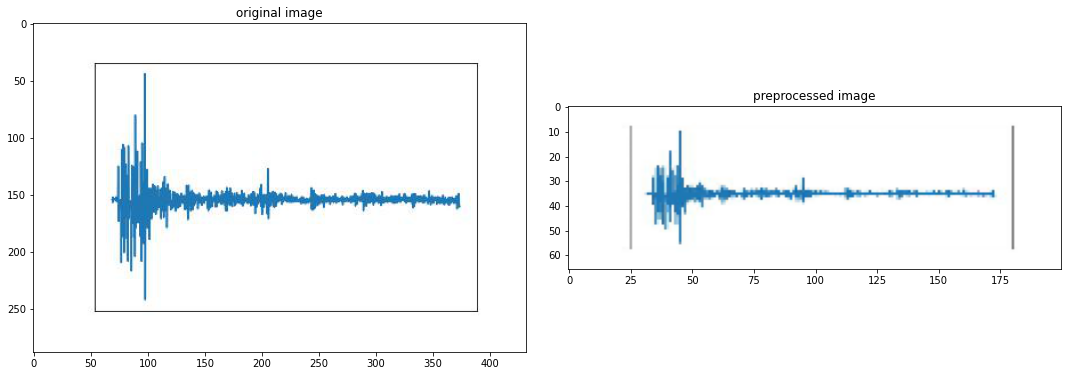

In [152]:
image = li[200]
original_image = mpimg.imread(image)

print(original_image.shape)

preprocessed_image = img_preprocess(image)
print(preprocessed_image.shape)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('preprocessed image')

In [153]:
li

['../input/wave-images/dataset/0.jpg',
 '../input/wave-images/dataset/1.jpg',
 '../input/wave-images/dataset/2.jpg',
 '../input/wave-images/dataset/3.jpg',
 '../input/wave-images/dataset/4.jpg',
 '../input/wave-images/dataset/5.jpg',
 '../input/wave-images/dataset/6.jpg',
 '../input/wave-images/dataset/7.jpg',
 '../input/wave-images/dataset/8.jpg',
 '../input/wave-images/dataset/9.jpg',
 '../input/wave-images/dataset/10.jpg',
 '../input/wave-images/dataset/11.jpg',
 '../input/wave-images/dataset/12.jpg',
 '../input/wave-images/dataset/13.jpg',
 '../input/wave-images/dataset/14.jpg',
 '../input/wave-images/dataset/15.jpg',
 '../input/wave-images/dataset/16.jpg',
 '../input/wave-images/dataset/17.jpg',
 '../input/wave-images/dataset/18.jpg',
 '../input/wave-images/dataset/19.jpg',
 '../input/wave-images/dataset/20.jpg',
 '../input/wave-images/dataset/21.jpg',
 '../input/wave-images/dataset/22.jpg',
 '../input/wave-images/dataset/23.jpg',
 '../input/wave-images/dataset/24.jpg',
 '../input

In [154]:
from sklearn.model_selection import train_test_split


In [155]:
X_train, X_valid, y_train, y_valid = train_test_split(img_list, oh_labels, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 268
Valid Samples: 68


In [156]:
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_valid.shape

(68, 288, 432, 3)

In [157]:
y_valid.shape

(68, 8)

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [88]:
num_rows = 288
num_columns = 432
num_channels = 3

num_labels = oh_labels.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=filter_size,
                 input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=filter_size, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=filter_size, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=filter_size, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax')) 

In [89]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [90]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_valid, y_valid, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 287, 431, 16)      208       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 143, 215, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 142, 214, 32)      2080      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 71, 107, 32)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 70, 106, 64)       8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 35, 53, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 52, 128)      

2022-01-28 10:53:51.265984: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3/3 [==============================] - 1s 83ms/step - loss: 71.8516 - accuracy: 0.0000e+00
Pre-training accuracy: 0.0000%


In [159]:
def nvidia_model():
 
  model = Sequential()
  
  model.add(Convolution2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(288,432,3),activation='elu'))
  
  model.add(Convolution2D(36, kernel_size=(5,5), strides=(2,2), activation='relu'))
  model.add(Convolution2D(48, kernel_size=(5,5), strides=(2,2), activation='relu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
  model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
  
  
  model.add(Dense(50, activation='relu'))
 # model.add(Dropout(0.5))

  model.add(Dense(10, activation ='relu'))
  model.add(Dense(8,activation='softmax'))
  
  
  optimizer= Adam(lr=1e-3)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
  
  return model

In [160]:
model = nvidia_model()
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 142, 214, 24)      1824      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 69, 105, 36)       21636     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 33, 51, 48)        43248     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 31, 49, 64)        27712     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 29, 47, 64)        36928     
_________________________________________________________________
dropout_10 (Dropout)         (None, 29, 47, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 87232)            

In [161]:
history = model.fit(X_train,y_train,epochs=40,batch_size=16,validation_data=(X_valid,y_valid),verbose=1,shuffle=1)

Epoch 1/40
17/17 [==============================] - 9s 483ms/step - loss: 12.4737 - accuracy: 0.1754 - val_loss: 2.0604 - val_accuracy: 0.0735
Epoch 2/40
17/17 [==============================] - 8s 462ms/step - loss: 2.0505 - accuracy: 0.1866 - val_loss: 1.9931 - val_accuracy: 0.2647
Epoch 3/40
17/17 [==============================] - 8s 481ms/step - loss: 2.0002 - accuracy: 0.2015 - val_loss: 1.9571 - val_accuracy: 0.2794
Epoch 4/40
17/17 [==============================] - 9s 506ms/step - loss: 2.0026 - accuracy: 0.2127 - val_loss: 2.0225 - val_accuracy: 0.3382
Epoch 5/40
17/17 [==============================] - 8s 468ms/step - loss: 1.9916 - accuracy: 0.2463 - val_loss: 1.8750 - val_accuracy: 0.3382
Epoch 6/40
17/17 [==============================] - 8s 468ms/step - loss: 1.9650 - accuracy: 0.2612 - val_loss: 1.9088 - val_accuracy: 0.3382
Epoch 7/40
17/17 [==============================] - 8s 467ms/step - loss: 1.8971 - accuracy: 0.2985 - val_loss: 1.8583 - val_accuracy: 0.3382
Epoch

In [ ]:

wav_fname = "../input/lung-dataset/Audio Files/BP4_Heart Failure + Lung Fibrosis ,I C,P L R,72,F.wav"
def read_wave(wav_fname):
    samplerate, data = wavfile.read(wav_fname)
    print("sample rate : ",samplerate)
    print("data : ",data)
    print("data shape : ",data.shape)
    print(f"number of channels = {data.shape[0]}")
    # number of channels = 2

    length = data.shape[0] / samplerate

    print(f"length = {length}s")
    # length = 0.01s
read_wave(wav_fname)

In [ ]:
samplerate, data = wavfile.read(wav_fname)
print("sample rate : ",samplerate)
print("data : ",data)
print("data shape : ",data.shape)
print(f"number of channels = {data.shape[0]}")
    # number of channels = 2

length = data.shape[0] / samplerate

print(f"length = {length}s")
    # length = 0.01s

In [ ]:

time = np.linspace(0., length, data.shape[0])

plt.plot(time, data[:], label="Left channel")

plt.savefig("output2", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
# plt.plot(time, data[:, 1], label="Right channel")

plt.legend()

plt.xlabel("Time [s]")

plt.ylabel("Amplitude")


plt.show()


In [ ]:

# rng = np.random.default_rng(data,samplerate)

# sample_freq, segment_time, spec_data = signal.spectrogram(data, samplerate) 
# # print("sample frequency : ",sample_freq)
# # print("segment time  :",segment_time)
# # print("spec data : ",spec_data)


In [ ]:
# plt.pcolormesh(segment_time, sample_freq, spec_data )
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()  

# # **spectrograph using tensorflow **



In [ ]:
def get_spectrogram(waveform):
  # Zero-padding for an audio waveform with less than 16,000 samples.
  input_len = 16000
  waveform = waveform[:input_len]
  zero_padding = tf.zeros(
      [16000] - tf.shape(waveform),
      dtype=tf.float32)
  # Cast the waveform tensors' dtype to float32.
  waveform = tf.cast(waveform, dtype=tf.float32)
  # Concatenate the waveform with `zero_padding`, which ensures all audio
  # clips are of the same length.
  equal_length = tf.concat([waveform, zero_padding], 0)
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [ ]:
# for waveform, label in waveform_ds.take(1):
#   label = label.numpy().decode('utf-8')
spectrogram = get_spectrogram(data)

# print('Label:', label)
print('Waveform shape:', data.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
display.display(display.Audio(data, rate=16000))


In [ ]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)


In [ ]:


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(data.shape[0])
axes[0].plot(timescale, data)
# axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
# axes[1].set_title('Spectrogram')
plt.show()
